# Machine Learning for time series

**Author:** Oscar Hernández Terán                                               
**Date:** March 16, 2023

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/DailyDelhiClimateTest.csv')
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [3]:
df.describe()

meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

In [4]:
# Analysis of Nan
pd.DataFrame(df.isna().sum(), columns=['Missing data'])

Missing data
date                     0
meantemp                 0
humidity                 0
wind_speed               0
meanpressure             0

In [5]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


From the displayed information we can change the data type of the date.

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


## Visualization of time series

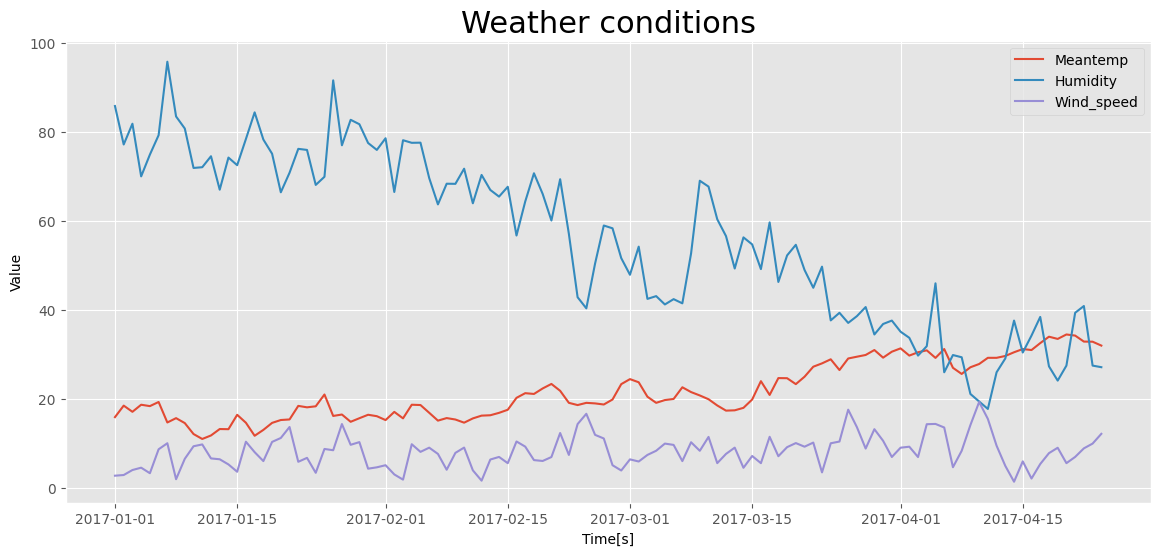

In [7]:
plt.figure(figsize=(14, 6))
for var in df.columns[1:-1]:
    plt.plot(df['date'], df[var], label=var.capitalize())
plt.title('Weather conditions', fontsize=22)
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Value')
plt.show()

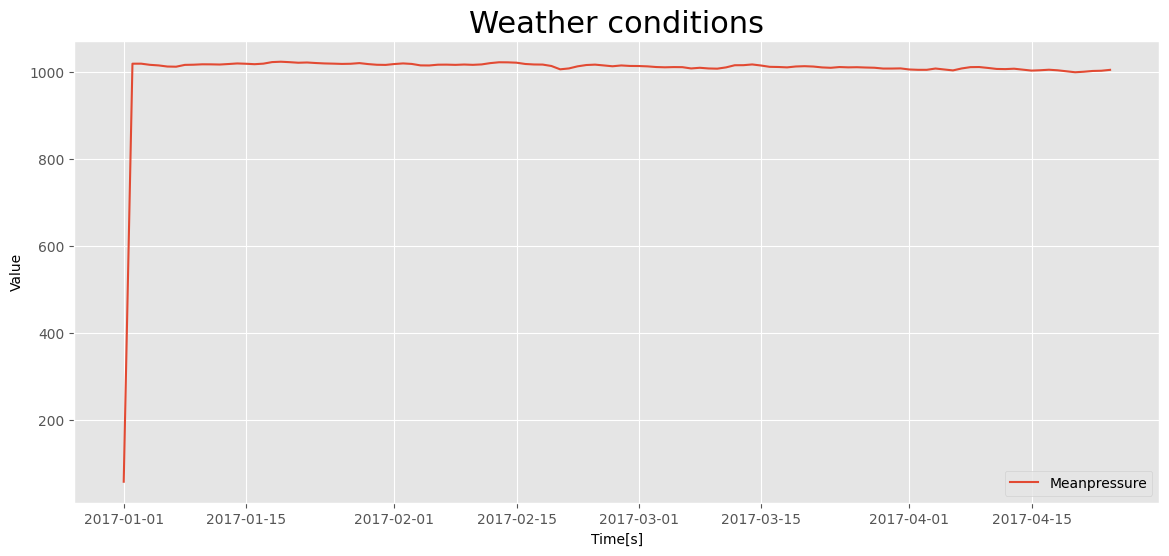

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['meanpressure'], label='meanpressure'.capitalize())
plt.title('Weather conditions', fontsize=22)
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Value')
plt.show()

# Missing data handling


For this exercise, we will delete a portion of the data to simulate that it does not exist.

In [9]:
# Replace somve values for Nan 
df_ = df.copy()
df_.iloc[10:20] = None

# Cut the 
df_ = df_.drop(['meanpressure'], axis=1)
df_.head(20)

date   meantemp   humidity  wind_speed
0  2017-01-01  15.913043  85.869565    2.743478
1  2017-01-02  18.500000  77.222222    2.894444
2  2017-01-03  17.111111  81.888889    4.016667
3  2017-01-04  18.700000  70.050000    4.545000
4  2017-01-05  18.388889  74.944444    3.300000
5  2017-01-06  19.318182  79.318182    8.681818
6  2017-01-07  14.708333  95.833333   10.041667
7  2017-01-08  15.684211  83.526316    1.950000
8  2017-01-09  14.571429  80.809524    6.542857
9  2017-01-10  12.111111  71.944444    9.361111
10        NaT        NaN        NaN         NaN
11        NaT        NaN        NaN         NaN
12        NaT        NaN        NaN         NaN
13        NaT        NaN        NaN         NaN
14        NaT        NaN        NaN         NaN
15        NaT        NaN        NaN         NaN
16        NaT        NaN        NaN         NaN
17        NaT        NaN        NaN         NaN
18        NaT        NaN        NaN         NaN
19        NaT        NaN        NaN         NaN

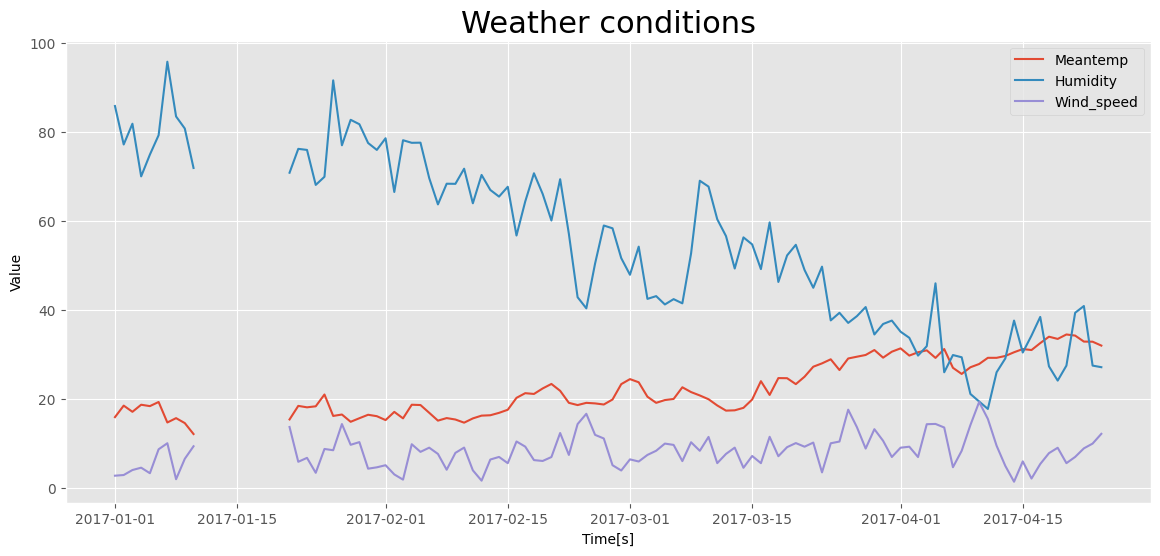

In [10]:
plt.figure(figsize=(14, 6))
for var in df.columns[1:-1]:
    plt.plot(df_['date'], df_[var], label=var.capitalize())
plt.title('Weather conditions', fontsize=22)
plt.legend()
plt.xlabel('Time[s]')
plt.ylabel('Value')
plt.show()

In [11]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(df, interpolation):

    # Create a boolean mask for missing values
    missing_values = df.isna()

    # Interpolate the missing values
    df_interp = df.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(14, 6))
    df_interp.plot( alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    df_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.title('Weather conditions interpolate', fontsize=18)
    plt.show()

In [12]:
# Cut the colum date
df_ = df_.drop(['date'], axis=1)

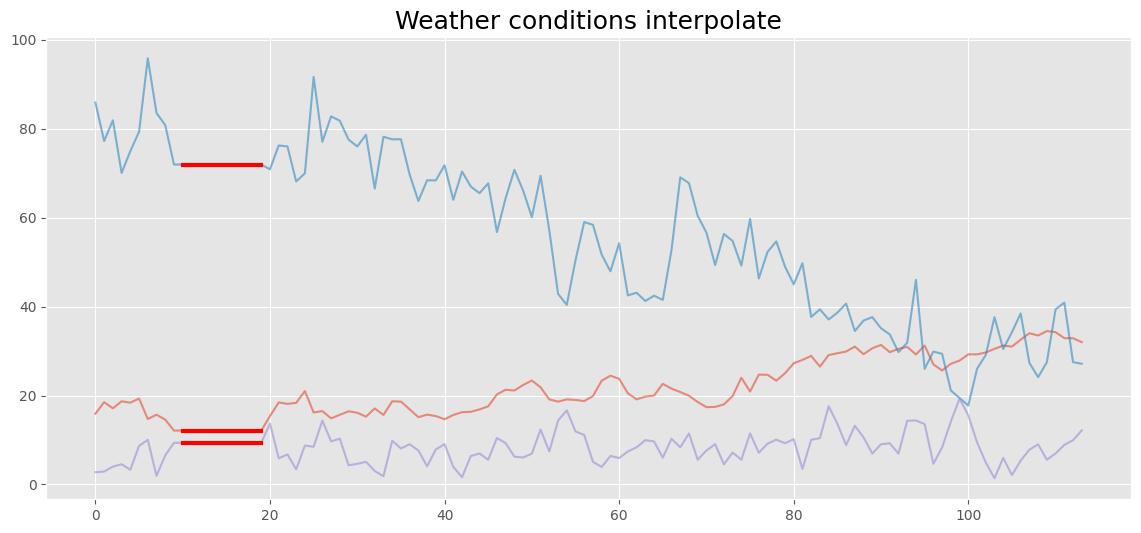

In [13]:
interpolation_type = 'zero'
interpolate_and_plot(df_, interpolation_type) 

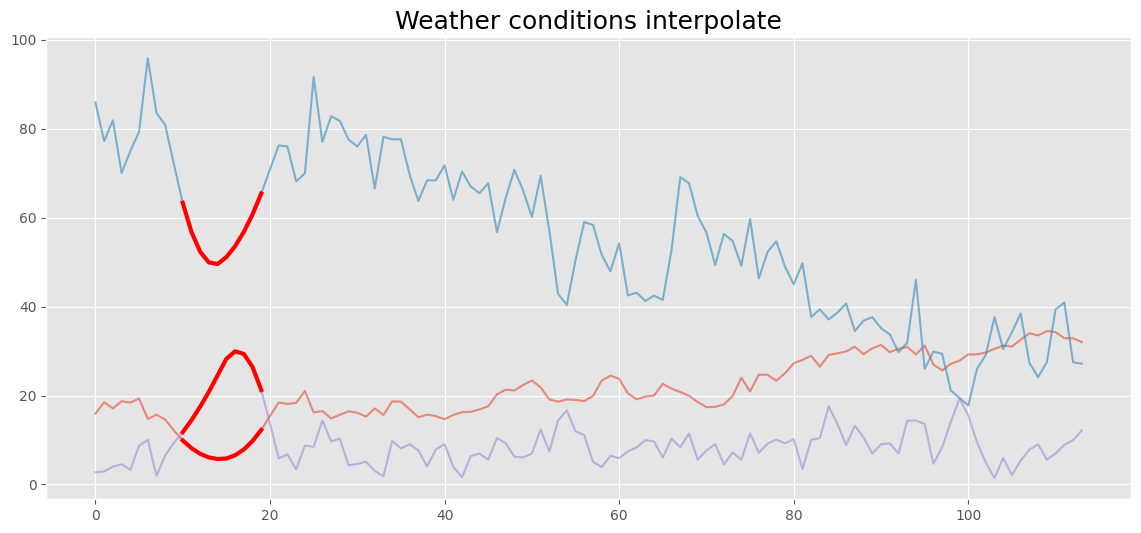

In [14]:
interpolation_type = 'quadratic'
interpolate_and_plot(df_, interpolation_type) 

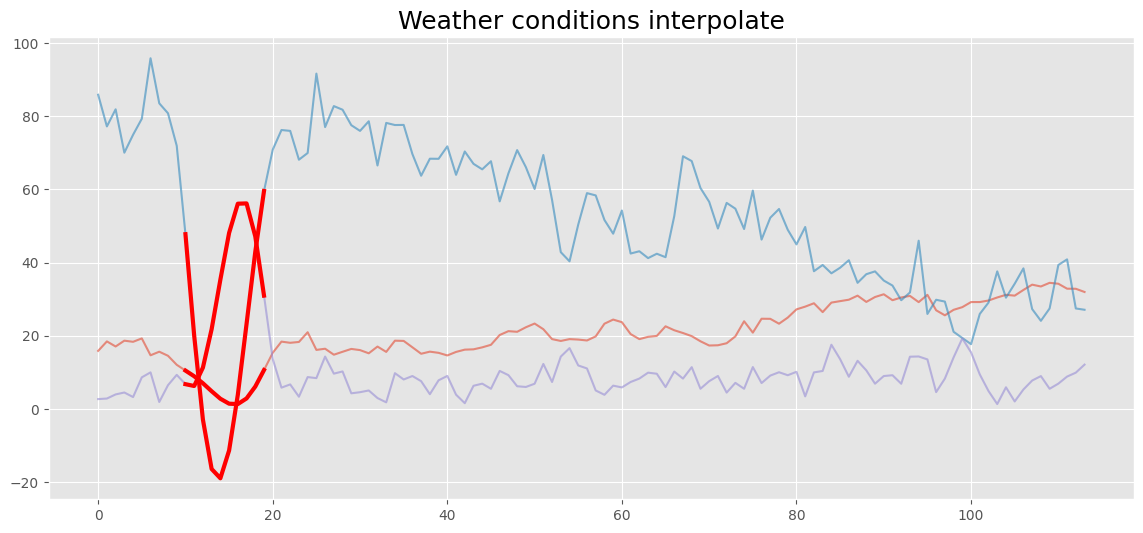

In [15]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(df, interpolation):

    # Create a boolean mask for missing values
    missing_values = df.isna()

    # Interpolate the missing values
    df_interp = df.interpolate(interpolation, order=5)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(14, 6))
    df_interp.plot(alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    df_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.title('Weather conditions interpolate', fontsize=18)
    plt.show()

# Interpolate using the latest non-missing value
interpolation_type = 'polynomial'
interpolate_and_plot(df_, interpolation_type)    

## Outlier detection

Text(0.5, 1.0, 'Outlier detection')

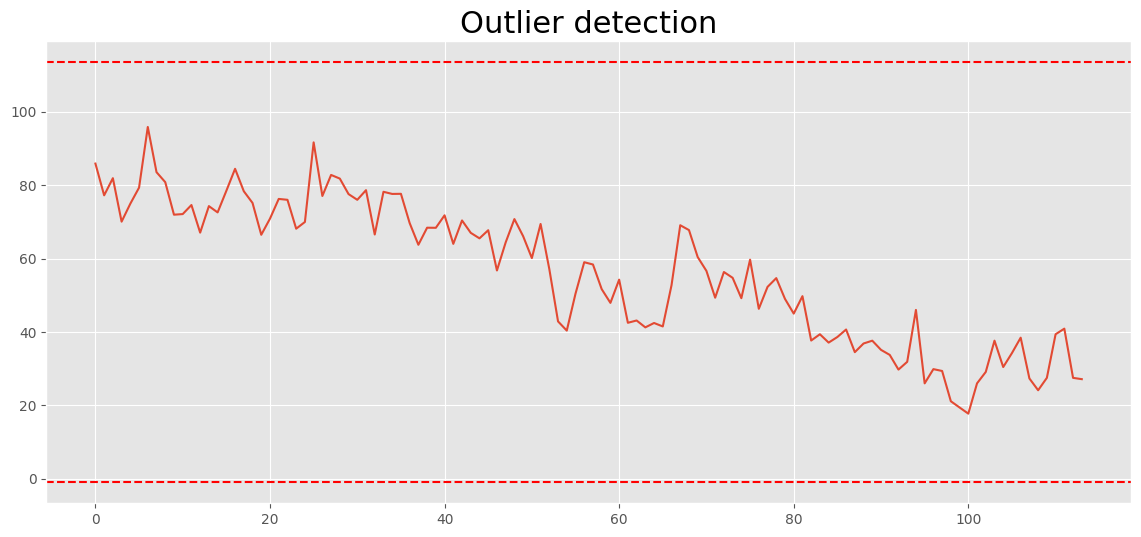

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
data = df['humidity']
ax.plot(data)
# Calculate the mean / standard deviation for the data    
this_mean = data.mean()    
this_std = data.std()
# Plot the data, with a window that is 3 standard deviations # around the mean    
ax.axhline(this_mean + this_std * 3, ls='--', c='r')    
ax.axhline(this_mean - this_std * 3, ls='--', c='r')
plt.title('Outlier detection', fontsize=22)

## Replace Outliers

Text(0.5, 1.0, 'Outlier detection')

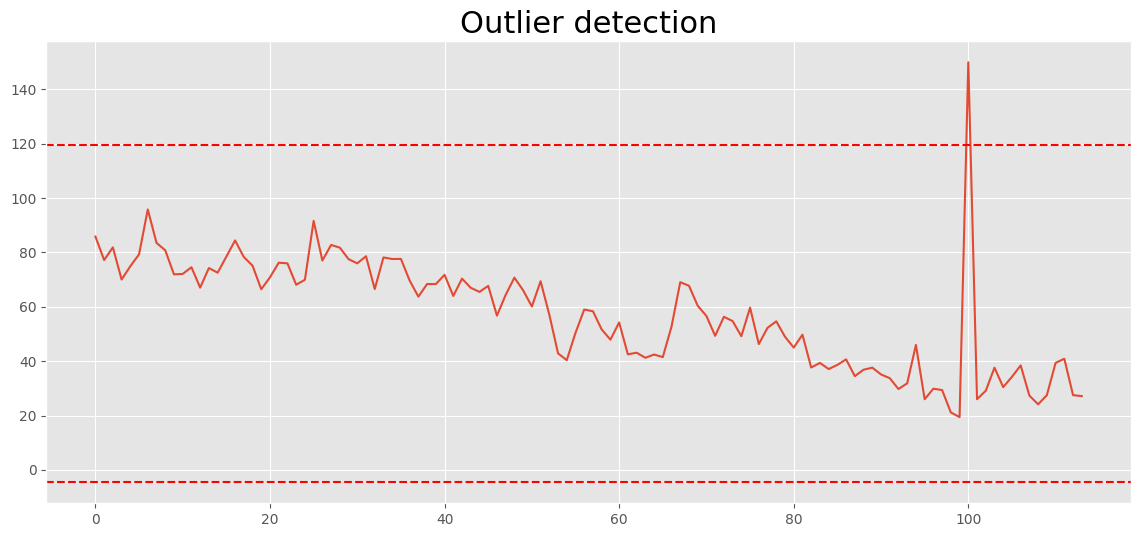

In [48]:
# We create a copy 
df_out = df.copy()
# Change a value
df_out['humidity'].iloc[100] = 150
# Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
data = df_out['humidity']
ax.plot(data)
# Calculate the mean / standard deviation for the data    
this_mean = data.mean()    
this_std = data.std()
# Plot the data, with a window that is 3 standard deviations # around the mean    
ax.axhline(this_mean + this_std * 3, ls='--', c='r')    
ax.axhline(this_mean - this_std * 3, ls='--', c='r')
plt.title('Outlier detection', fontsize=22)

## Engineer with multiple rolling

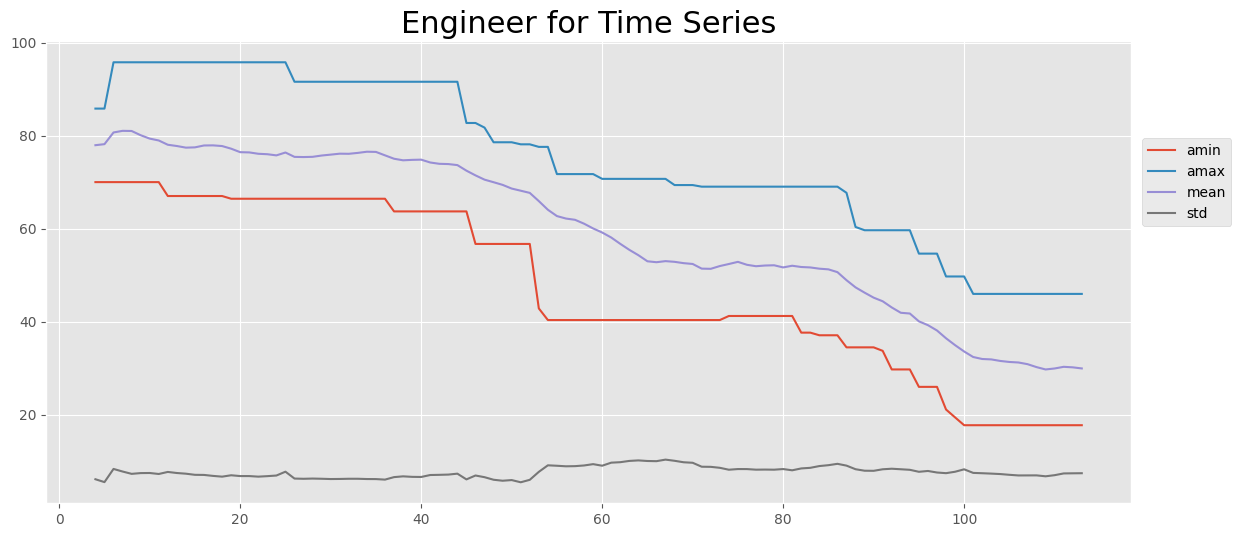

In [17]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = df['humidity'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.plot(figsize=(14, 6))
ax.legend(loc=(1.01, .6))
plt.title("Engineer for Time Series", fontsize=22)
plt.show()

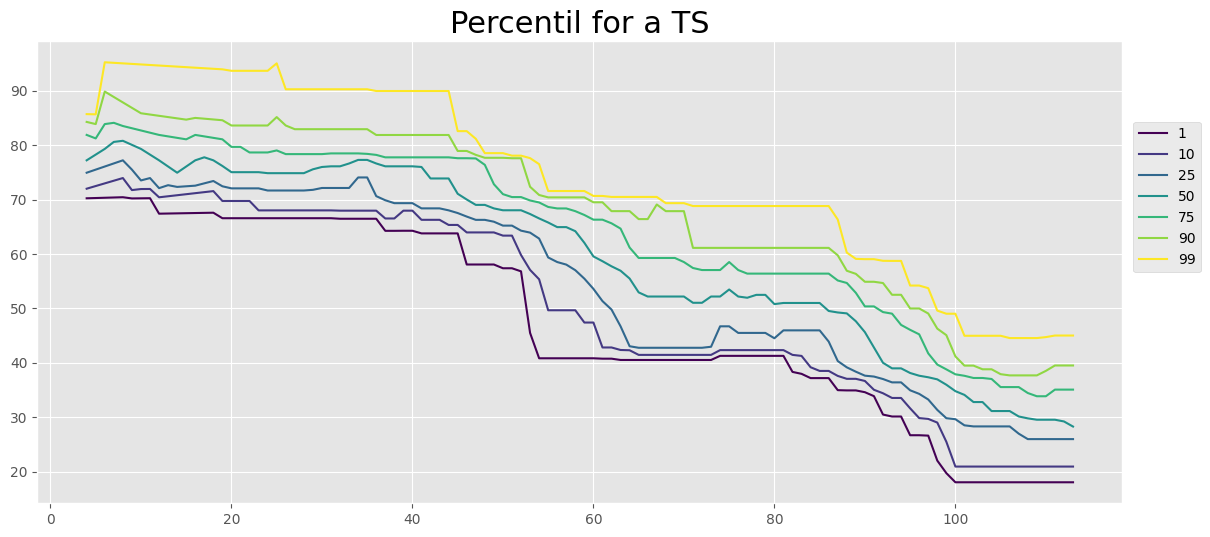

In [18]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = df['humidity'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.plot(cmap=plt.cm.viridis, figsize=(14, 6))
ax.legend(percentiles, loc=(1.01, .5))
plt.title('Percentil for a TS', fontsize=22)
plt.show()

### Lags

In [19]:
df_['humidity'].head()

0    85.869565
1    77.222222
2    81.888889
3    70.050000
4    74.944444
Name: humidity, dtype: float64

In [20]:
df_['humidity'].shift(3).head()

0          NaN
1          NaN
2          NaN
3    85.869565
4    77.222222
Name: humidity, dtype: float64

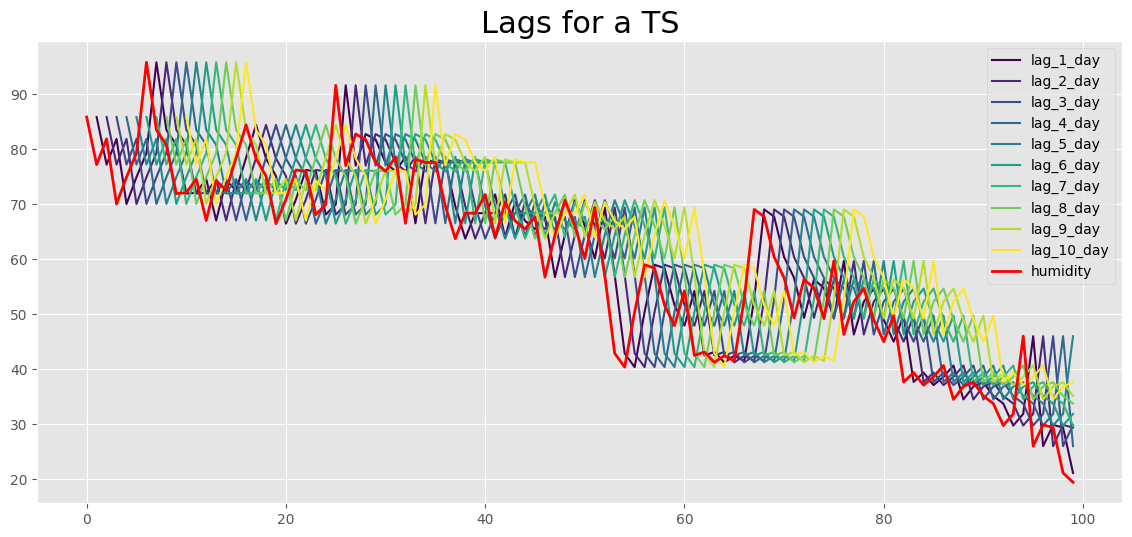

In [21]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): df['humidity'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
df_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = df_shifted.iloc[:100].plot(cmap=plt.cm.viridis, figsize=(14, 6))
df['humidity'].iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.title('Lags for a TS', fontsize=22)
plt.show()

In [22]:
# Replace missing values with the median for each column
X = df_shifted.fillna(np.nanmedian(df_shifted))
y = df['humidity'].fillna(np.nanmedian(df_['humidity']))

from sklearn.linear_model import Ridge

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge()

In [23]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

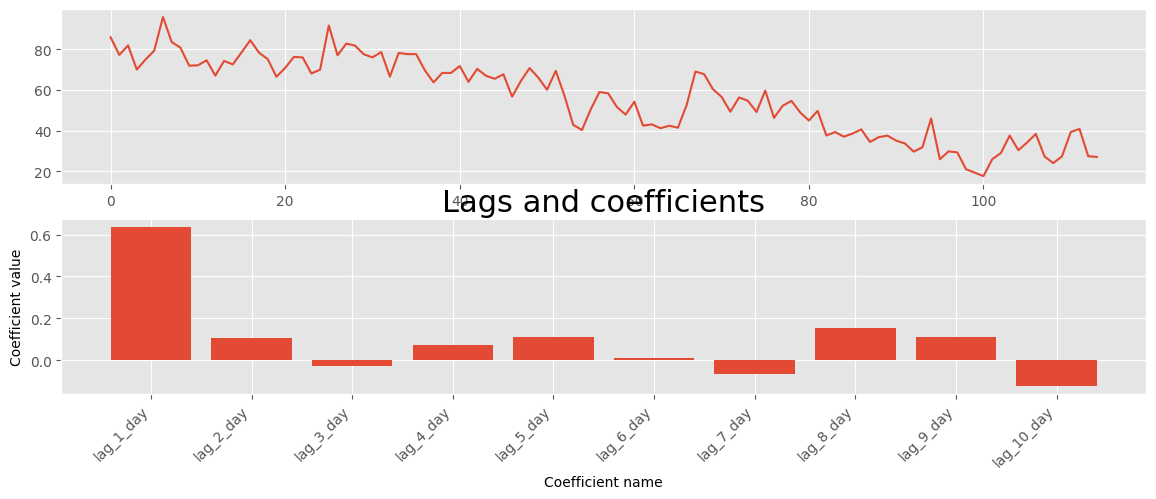

In [24]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(14, 5))
plt.title('Lags and coefficients', fontsize=22)
y.plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, df_shifted.columns, ax=axs[1])
plt.show()

## Cross validation

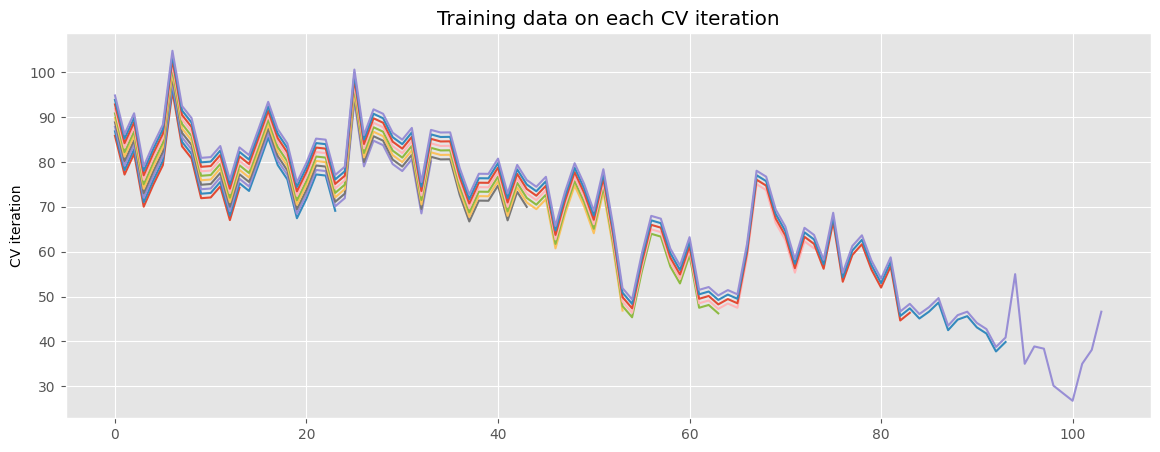

In [25]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots(figsize=(14, 5))
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()



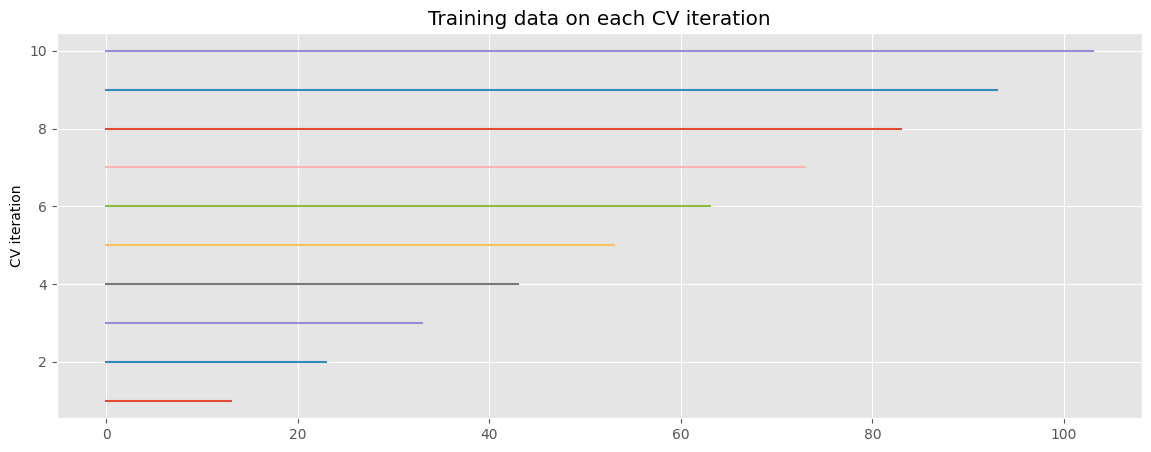

In [26]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# TS linear
y = np.ones(len(X))

# Iterate through CV splits
fig, ax = plt.subplots(figsize=(14, 5))
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

### Forecasting autorregresivo recursivo

In [27]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
datos = pd.read_csv(url, sep=',')
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%Y/%m/%d')
datos = datos.set_index('fecha')
datos = datos.rename(columns={'x': 'y'})
datos = datos.asfreq('MS')
datos = datos.sort_index()
forecast = datos

In [28]:
forecast.shape

(195, 3)

In [29]:
# Import the libraries
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

Fechas train : 1992-04-01 00:00:00 --- 2005-07-01 00:00:00  (n=160)
Fechas test  : 2005-08-01 00:00:00 --- 2008-06-01 00:00:00  (n=35)


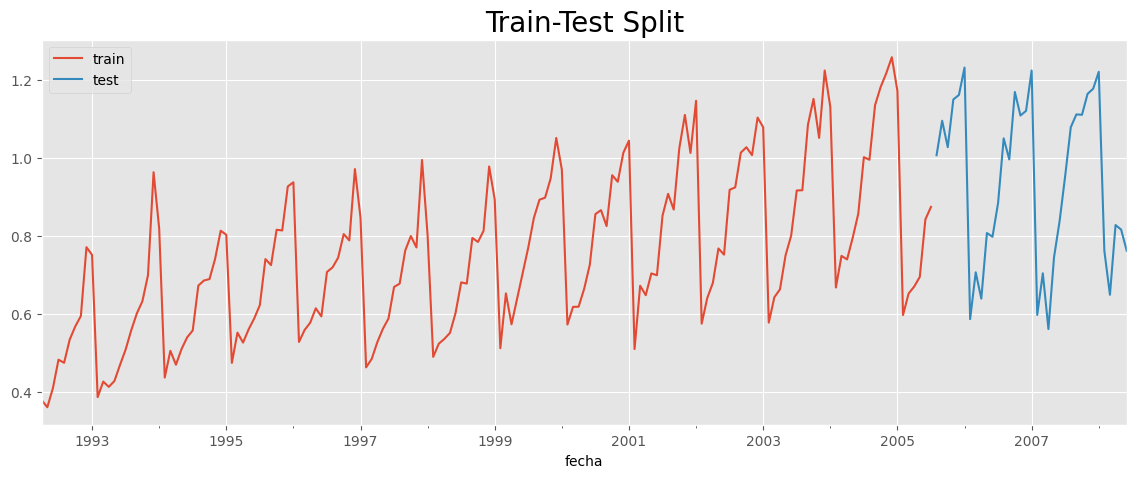

In [30]:
# Manual separation
# ==============================================================================
steps = 35
datos_train = forecast[:-steps]
datos_test  = forecast[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(14, 5))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
plt.title('Train-Test Split', fontsize=20)
ax.legend();

In [31]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 1
             )

forecaster.fit(y=datos_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-07-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-04-04 08:49:18 
Last fit date: 2023-04-04 08:49:18 
Skforecast version: 0.7.0 
Python version: 3.10.9 
Forecaster id: None 

In [32]:
steps = 35
predictions = np.array(forecaster.predict(steps=steps))
predictions = pd.DataFrame(predictions, index=forecast.index[-35:], columns=['Predictions'])

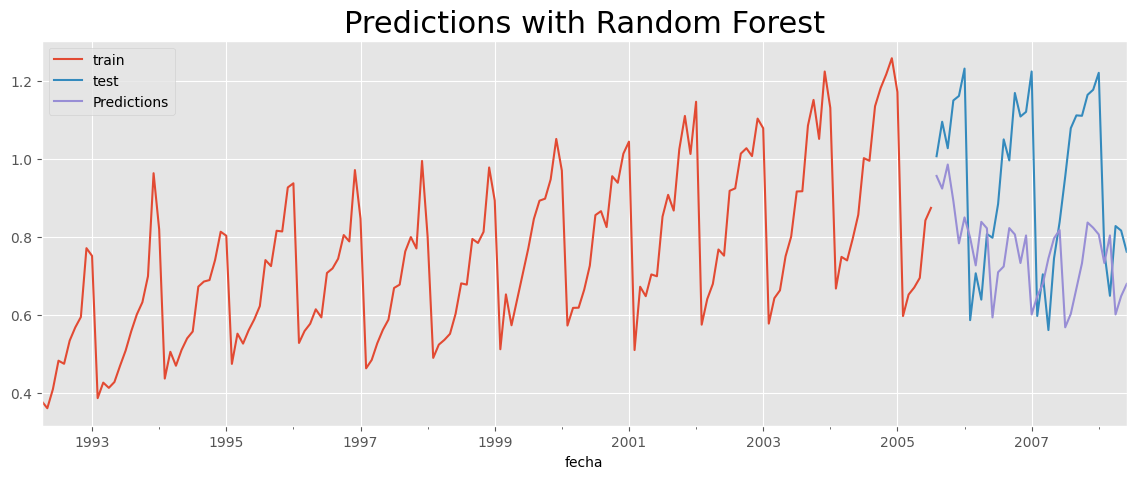

In [33]:
fig, ax = plt.subplots(figsize=(14, 5))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
predictions['Predictions'].plot(ax=ax, label='Predictions')
plt.title('Predictions with Random Forest', fontsize=22)
ax.legend();

In [43]:
steps = 35
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # Este valor será remplazado en el grid search
             )

# Lags utilizados como predictores
lags_grid = [10, 20]

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 10, 15]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                  )

Number of models compared: 24.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:38<00:00, 49.31s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.013108281716977855



In [35]:
resultados_grid

lags  \
7   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
6   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
10  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
9   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
8   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
11  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
0                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
3                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
5                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
2                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
4                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   

                                    params  mean_squared_error  max_depth  \
7    {'max_depth': 3, 'n_estimators': 500}            0.013108          3   
6    {'max_depth': 3, 'n_estimators': 100}            0.013149          3   
10  {'max_depth': 10, 'n_estimators': 100}            0.013626         10   
9    {'max_depth': 5, 'n_estimators': 500}            0.013639          5   
8    {'max_depth': 5, 'n_estimators': 100}            0.013647          5   
11  {'max_depth': 10, 'n_estimators': 500}            0.013946         10   
1    {'max_depth': 3, 'n_estimators': 500}            0.037251          3   
0    {'max_depth': 3, 'n_estimators': 100}            0.037425          3   
3    {'max_depth': 5, 'n_estimators': 500}            0.037484          5   
5   {'max_depth': 10, 'n_estimators': 500}            0.040188         10   
2    {'max_depth': 5, 'n_estimators': 100}            0.040693          5   
4   {'max_depth': 10, 'n_estimators': 100}            0.042921         10   

    n_estimators  
7            500  
6            100  
10           100  
9            500  
8            100  
11           500  
1            500  
0            100  
3            500  
5            500  
2            100  
4            100

<center>

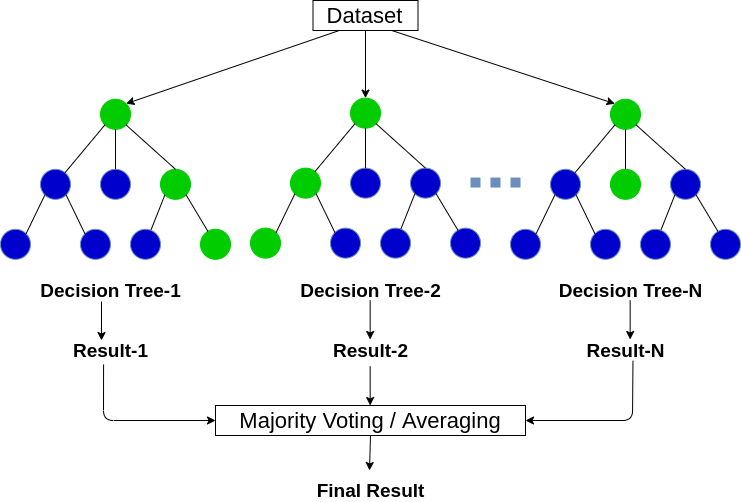

In [40]:
regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=datos_train['y'])

In [41]:
predictions = np.array(forecaster.predict(steps=steps))
predictions = pd.DataFrame(predictions, index=forecast.index[-35:], columns=['Predictions'])

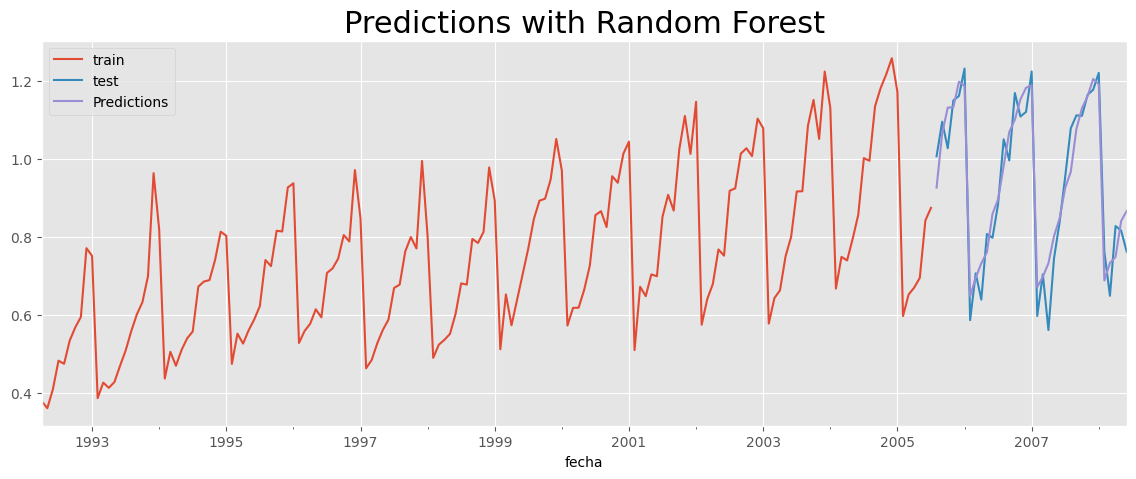

In [42]:
fig, ax = plt.subplots(figsize=(14, 5))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
predictions['Predictions'].plot(ax=ax, label='Predictions')
plt.title('Predictions with Random Forest', fontsize=22)
ax.legend();

## Review models for Time Series